In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')
from paths import *

In [2]:
ARMSS_DATA_PATH = '../../wetlab/data/patient_selection/clinical_data_with_ARMSS_score.csv'
FIGURE_PATH = '../../wetlab/data/patient_selection/figures'


## Load armss file (computed using the web service)

In [3]:
armss_data = pd.read_csv(ARMSS_DATA_PATH)

armss_data.dropna(subset='gARMSS', inplace=True)


## Distribution of global ARMSS score

/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_88908/4146200318.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(armss_data['gARMSS'], bins=10, kde=True, hist_kws={'color': 'gray'}, kde_kws={'color': 'red'})


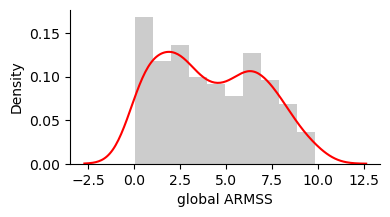

In [4]:

fig = plt.figure(figsize=(4, 2))

sns.distplot(armss_data['gARMSS'], bins=10, kde=True, hist_kws={'color': 'gray'}, kde_kws={'color': 'red'})

plt.xlabel('global ARMSS')
plt.ylabel('Density')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
fig_filename = os.path.join(FIGURE_PATH, 'global_ARMSS_distribution.svg')
fig.savefig(fig_filename, format='svg', bbox_inches='tight')


## Distribution of local ARMSS score

/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_88908/2617756642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(armss_data['lARMSS'], bins=10, kde=True, hist_kws={'color': 'gray'}, kde_kws={'color': 'red'})


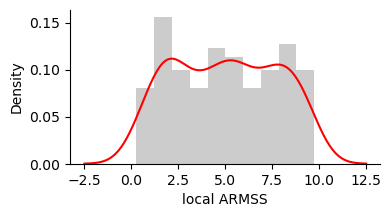

In [5]:

fig = plt.figure(figsize=(4, 2))

sns.distplot(armss_data['lARMSS'], bins=10, kde=True, hist_kws={'color': 'gray'}, kde_kws={'color': 'red'})

plt.xlabel('local ARMSS')
plt.ylabel('Density')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
fig_filename = os.path.join(FIGURE_PATH, 'local_ARMSS_distribution.svg')
fig.savefig(fig_filename, format='svg', bbox_inches='tight')


## Adding demographics information to armss dataframe

In [6]:
sample = "serum"

filename = SHORT_CHAIN_FATTY_ACID_DATA_FILENAME
mapping_filename = "short_chain_fatty_acid_spoke_map.csv"
file_path = os.path.join(DATA_ROOT_PATH, filename)

metabolomics_data = pd.read_excel(file_path, engine='openpyxl')
metabolomics_data = metabolomics_data[metabolomics_data["Client Matrix"]==sample]

armss_data_demographics = pd.merge(armss_data, metabolomics_data, left_on='Record.ID', right_on='Client Sample ID')[list(armss_data.columns) + ['Gender', 'Age']]

armss_data_demographics = armss_data_demographics.drop_duplicates()


In [11]:
armss_data_demographics[armss_data_demographics['Record.ID'].str.startswith('714')].sort_values(by='gARMSS')


,Unnamed: 0,Record.ID,ageatedss,dd,edss,gARMSS,lARMSS,lMSSS,uGMSSS,oGMSSS,Gender,Age
264,35,71401-0204,64,3,1.0,0.30,0.42,2.88,2.29,1.768,M,63.0
192,25,71401-0155,44,0,0.0,0.37,1.67,NaN,NaN,0.823,M,43.0
72,10,71401-0080,47,9,1.0,1.09,1.89,1.62,1.28,0.881,F,47.0
352,47,71401-0275,59,21,2.0,1.43,0.92,2.68,1.51,1.024,F,58.0
288,38,71401-0230,69,25,3.0,1.46,2.00,3.16,2.30,1.556,F,69.0
64,9,71401-0079,69,10,3.0,1.46,2.00,4.84,4.72,3.789,M,66.0
168,22,71401-0139,68,6,3.0,1.52,1.54,6.03,5.75,5.382,F,67.0
144,19,71401-0123,61,8,2.5,1.78,1.94,5.29,4.43,3.808,F,60.0
336,44,71401-0256,39,13,1.0,1.81,5.00,2.86,0.92,0.564,F,39.0
344,46,71401-0267,54,20,2.0,1.96,3.00,1.97,1.61,0.942,F,53.0


## Select 50 patients with higher and lower global ARMSS score

In [8]:
N = 50

armss_data_sorted = armss_data_demographics.sort_values(by='gARMSS')

armss_data_lower = armss_data_sorted.head(N)
armss_data_higher = armss_data_sorted.tail(N)


In [9]:
armss_data_higher_female_count = armss_data_higher[armss_data_higher.Gender=='F'].shape[0]
armss_data_higher_male_count = armss_data_higher[armss_data_higher.Gender=='M'].shape[0]

print('Female count in higher ARMSS group = ',armss_data_higher_female_count)
print('Male count in higher ARMSS group = ',armss_data_higher_male_count)
print('')


armss_data_lower_female_count = armss_data_lower[armss_data_lower.Gender=='F'].shape[0]
armss_data_lower_male_count = armss_data_lower[armss_data_lower.Gender=='M'].shape[0]


print('Female count in lower ARMSS group = ',armss_data_lower_female_count)
print('Male count in lower ARMSS group = ',armss_data_lower_male_count)


Female count in higher ARMSS group =  32
Male count in higher ARMSS group =  18

Female count in lower ARMSS group =  39
Male count in lower ARMSS group =  11


In [10]:
armss_data_lower

,Unnamed: 0,Record.ID,ageatedss,dd,edss,gARMSS,lARMSS,lMSSS,uGMSSS,oGMSSS,Gender,Age
408,54,71501-0026,68,13,0.0,0.05,0.38,1.29,0.24,0.134,F,67.0
1640,212,76401-0008,61,6,0.0,0.08,0.32,0.90,0.49,0.254,F,60.0
1040,134,71701-0169,58,23,0.0,0.12,0.29,0.58,0.11,0.053,F,57.0
1368,178,71801-0047,55,21,0.0,0.17,0.65,0.54,0.14,0.049,F,56.0
1464,190,71801-0150,54,17,0.0,0.17,0.67,0.43,0.20,0.053,F,54.0
704,91,71701-0067,53,6,0.0,0.19,0.83,0.90,0.49,0.254,F,52.0
1440,187,71801-0112,51,11,0.0,0.22,0.56,1.11,0.31,0.167,F,51.0
1696,219,76401-0029,48,7,0.0,0.29,0.69,0.86,0.46,0.238,F,47.0
264,35,71401-0204,64,3,1.0,0.30,0.42,2.88,2.29,1.768,M,63.0
1512,196,71801-0176,47,7,0.0,0.31,0.81,0.86,0.46,0.238,F,46.0


In [11]:
armss_data_higher

,Unnamed: 0,Record.ID,ageatedss,dd,edss,gARMSS,lARMSS,lMSSS,uGMSSS,oGMSSS,Gender,Age
120,16,71401-0115,64,30,6.5,6.65,8.12,7.19,6.14,5.684,M,63.0
1784,230,76501-0078,42,11,4.0,6.67,8.57,5.28,5.82,4.930,F,41.0
1296,168,71701-0270,47,2,5.0,6.72,7.30,8.53,8.77,9.179,M,47.0
568,74,71701-0010,55,27,6.0,6.72,7.10,5.83,4.86,4.925,F,54.0
608,79,71701-0041,55,26,6.0,6.72,7.10,6.09,5.45,5.019,F,55.0
1112,145,71701-0199,63,30,6.5,6.81,8.04,7.19,6.14,5.684,M,62.0
1648,213,76401-0009,43,26,4.5,6.94,9.17,3.70,3.86,2.994,F,43.0
1224,159,71701-0248,53,4,6.0,6.95,7.50,8.93,8.87,9.079,F,52.0
1320,172,71701-0276,53,30,6.0,6.95,7.50,4.90,4.72,4.354,F,53.0
1072,139,71701-0179,53,25,6.0,6.95,7.50,6.84,5.58,4.875,F,52.0


In [12]:
armss_data_lower.to_csv('../../wetlab/data/patient_selection/patients_with_armss_data_lower.csv', index=False)
armss_data_higher.to_csv('../../wetlab/data/patient_selection/patients_with_armss_data_higher.csv', index=False)
